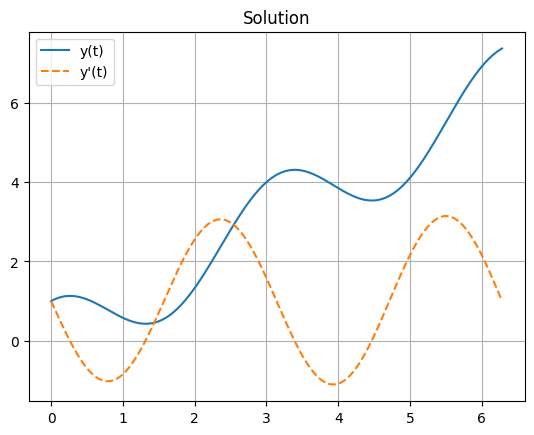

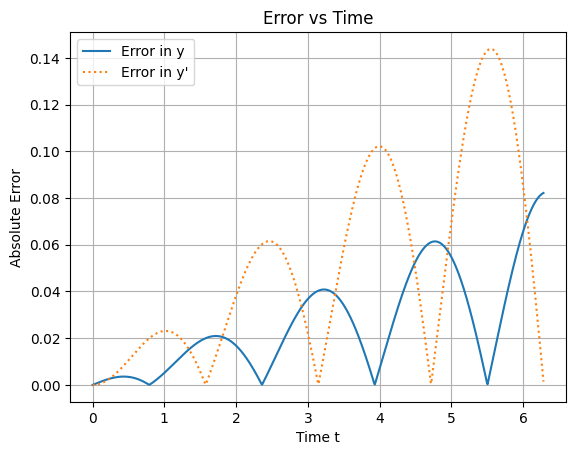

In [15]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from prettytable import PrettyTable


def euler(du_dt, tspan, u0, n):
    
    a, b = tspan
    h = (b - a) / n
    t = np.linspace(a, b, n+1)
    u = np.zeros((n+1, len(np.atleast_1d(u0))))
    u[0] = u0
    for i in range(n):
        u[i+1] = u[i] + h * du_dt(t[i], u[i])

    return t, u.T

def system(t, u):
    """
    定义微分方程组:
    u[0] = y
    u[1] = y'
    返回 [y', y'']
    """
    y = u[0]
    y_prime = u[1]
    
    dydt = y_prime
    dy_primedt = 4*t - 4*y
    
    return np.array([dydt, dy_primedt])

def exact_solution(t):
    """返回精确解 y 和 y' """
    y_exact = t + np.cos(2*t)
    y_prime_exact = 1 - 2*np.sin(2*t)
    
    return y_exact, y_prime_exact

u0 = [1, 1]
tspan = [0, 2 * np.pi]
res_t, res_u = euler(system, tspan, u0, 1000)

y_exact, y_prime_exact = exact_solution(res_t)
error_y = np.abs(res_u[0] - y_exact)
error_prime = np.abs(res_u[1] - y_prime_exact)

fig, ax = plt.subplots()
ax.plot(res_t, res_u[0], label = "y(t)")
ax.plot(res_t, res_u[1], label = "y'(t)", linestyle='--')
ax.set_title("Solution")
ax.legend()
ax.grid()

fig, ax = plt.subplots()
ax.plot(res_t, error_y, label='Error in y')
ax.plot(res_t, error_prime, label="Error in y'", linestyle=':')
ax.set_title("Error vs Time")
ax.set_xlabel("Time t")
ax.set_ylabel("Absolute Error")
ax.legend()
ax.grid()